# Solving image classification through Convolutional Neural Networks

We are going predict numbers on an image using a Machine Leaning technique called Convolutional N 

Actually, we are going to classify images in classes from 0 to 9.

The dataset we are going to use will be the MNIST dataset.

This is a famous dataset that contains lots of handwritten digits. 

**Note:** Convolutional Neural Networks are also called CNNs of CONVnets.

In [7]:
import keras

from keras.datasets import mnist

from keras.models import Model

from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

from keras.utils import to_categorical

In [8]:
# Number of classes we are going to predict
num_classes = 10

# Number of images included on one epoch
batch_size = 100

# Number of epochs we a going t train our model
epochs = 1

# Size of the images loaded from the MNIST dataset
img_rows, img_cols = 28, 28

# Loading dataset

We are going to use the MNIST dataset from Keras framework

In [9]:
# Loading dataset from keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshaping Xs inputs
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Encoding classes into OneHot arrays
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

input_shape = (img_rows, img_cols, 1)

# Casting train set to float and normalize it to decimal scale (/= 255)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

# Exploring the dataset

In [10]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000, 10)
y_test shape: (10000, 10)
60000 train samples
10000 test samples


In [17]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Ploting image samples

In [14]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,9)

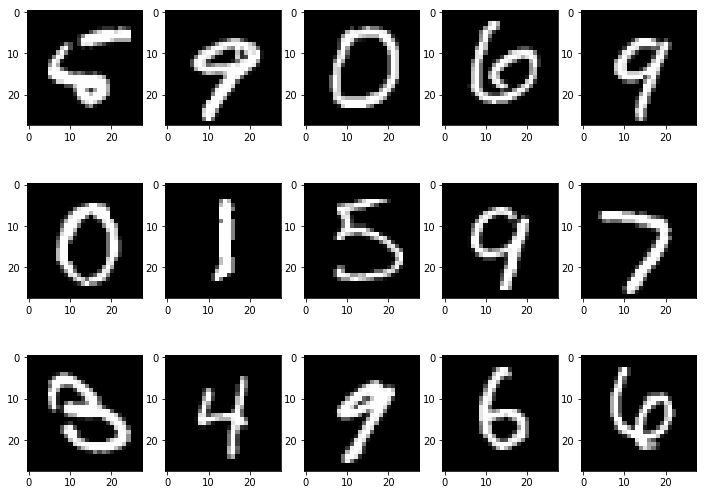

In [16]:
from itertools import product

lines, columns = (3,5)
sample_id = 8
for line, column in product(range(lines), range(columns)):
    ax1 = plt.subplot2grid((lines, columns), (line, column))
    sample_image = x_test[sample_id]
    image = sample_image.reshape(28, 28)
    imgplot = ax1.imshow(image, cmap='gray')
    sample_id += 1

# Convolutional Network Model

![image](assets/cnn.jpeg)

For the convolutional networks, images are just a matrix of numbers.

In the case of our MNIST dataset we have images of size 32 x 32. As the images got three channels (RGB) we end up with a matrix of 32 x 32 x 3 ( = 3072 features)

For an image of 256 X 256 we have almost 200.000 cell (features) to process. That's why the conventional approach of a regular neural network isn't applied for image classification. They are too computational expensive for this task.

# Layers details 


![structure](assets/cnn-layers.png)

# Convolution

Animation of a convolution of filter 3x3 on a volume of 5x5 with stride 1

![SegmentLocal](assets/convolution.gif "segment")


# Max polling

A technique to reduce the volume size without losing much information.

![title](assets/maxpool.png)

# Convolutional model

In [23]:
X_inputs = Input(input_shape)

X = Conv2D(32, (3, 3), activation='relu')(X_inputs)
X = Conv2D(64, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Dropout(rate=0.25)(X)

X = Flatten()(X)

# X = Dense(128, activation='relu')(X)
# X = Dropout(rate=0.5)(X)

X = Dense(num_classes, activation='softmax')(X)

model = Model(inputs=X_inputs, outputs=X)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                92170     
Total para

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

model.fit(
    x_train, 
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 107s 2ms/step - loss: 0.2033 - acc: 0.9378 - val_loss: 0.0631 - val_acc: 0.9805


OK (5 == 5)


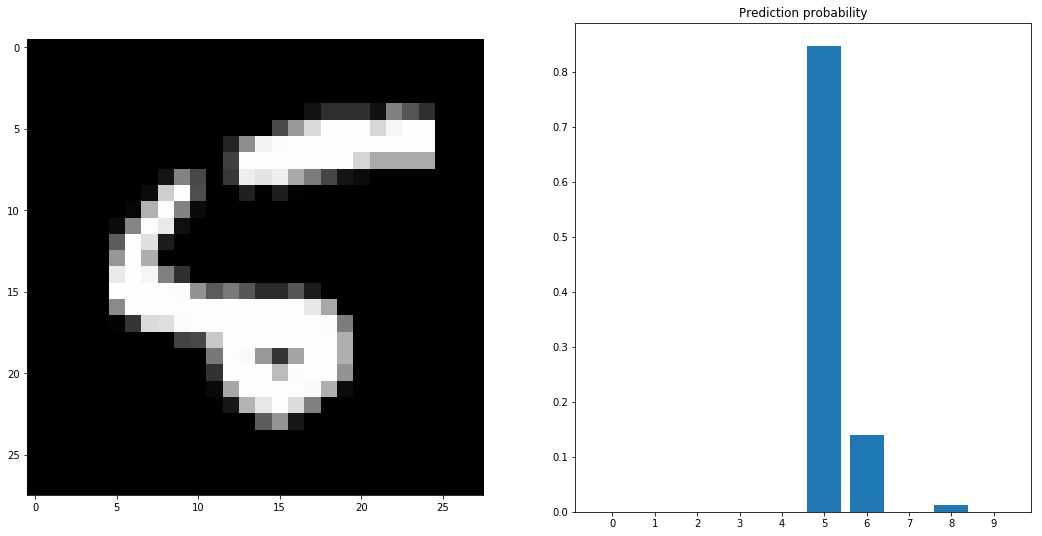

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Set image size on matplotlib
plt.rcParams['figure.figsize'] = (18,9)

# Choosing sample id
sample_id = 8

# Extracting sample image and label from test dataset
sample_image = x_test[sample_id]
sample_label = y_test[sample_id]

# Reshaping sample image
sample_image = sample_image.reshape((1, 28, 28, 1))

# Retrieving model prediction
probs = model.predict(sample_image)

# Finding the image class
prediction = np.argmax(probs)
label = np.argmax(sample_label)

prediction_tag = 'OK' if label == prediction else 'NOK'
print('{} ({} == {})'.format(prediction_tag, label, prediction))

# Ploting
ax1 = plt.subplot2grid((1,2), (0, 0))
ax2 = plt.subplot2grid((1,2), (0, 1))

image = sample_image.reshape(28, 28)
imgplot = ax1.imshow(image, cmap='gray')

plt.title('Prediction probability')

ax2.bar([str(i) for i in range(10)], probs[0]);